In [2]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import astropy.units as u

from config.plotting import save_figure, set_plotting_defaults, Tab10
from config.units import Gauss, flux_unit
from spectrum_fit_protons import ProtonSpectrumFit
from config.settings import MCMC_PROTONS, SPECTRUM_DIR
from src.synchrotron_emission import electron_synchrotron_emission_power, electron_synchrotron_emission_luminosity

set_plotting_defaults()

In [3]:
data = pickle.load(open(os.path.join(SPECTRUM_DIR, "UHE_spectrum_corrected.pck"), "rb"))

names, e, f_cor, f_l_cor, f_p_cor, e_l, e_p = data

In [4]:
nsteps, nwalkers = 2000, 64

data = pickle.load(open(os.path.join(MCMC_PROTONS, f"protons_{nsteps}n_{nwalkers}w.pck"), "rb"))

result, proton_spectrum_fit = data[0], data[1]

In [5]:
result_mod = result[(np.abs(result[:, 1] - 2.3) < 0.6) * (result[:, 2] < 6)]

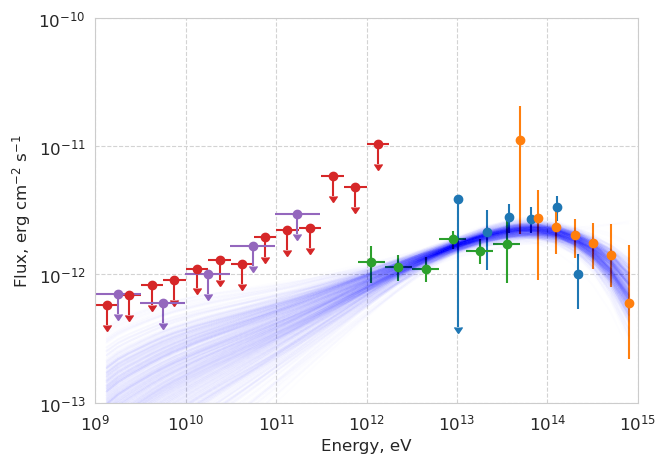

In [6]:
for i, name in enumerate(names):
    plt.errorbar(e[i], f_cor[i], xerr=[e_l[i], e_p[i]], yerr=[f_l_cor[i], f_p_cor[i]],
                 fmt='o', linestyle='None', uplims=f_p_cor[i] <= 0,
                 color=Tab10[i], label=f' ')

for res in result_mod[::5]:
    plt.plot(proton_spectrum_fit.photon_energy, proton_spectrum_fit.model(res), alpha=.008, color='blue')

plt.xscale('log')
plt.xlim(1e9, 1e15)
plt.xlabel("Energy, eV")

plt.yscale('log')
plt.ylim(1e-13, 1e-10)
plt.ylabel(r"Flux, $\mathrm{erg~cm^{-2}~s^{-1}}$")
save_figure("spectrum_with_a_proton_fit_mcmc")
plt.show()

[0.68799573 2.20428652 3.48138411]


<Figure size 800x600 with 0 Axes>

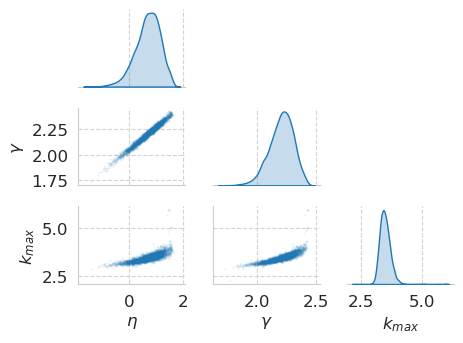

In [8]:
columns = [r"$\eta$", r"$\gamma$", r"$k_{max}$"]
fs = pd.DataFrame(result_mod, columns=columns)
print(np.mean(result_mod, axis=0))

plt.figure(figsize=(8, 6))
g = sns.pairplot(fs, diag_kind="kde",
                plot_kws=dict(marker=".", linewidth=0, alpha=.1, s=10),
                corner=True, height=1.2, aspect=4/3)
# g.map_lower(sns.kdeplot, levels=5, color=".2", alpha=.3)
plt.tight_layout()
# save_figure(f"proton_pairplot{nsteps}")
plt.show()